In [24]:
from sklearn import model_selection, preprocessing, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import ensemble
import matplotlib.pyplot as plt
import pandas as pd, numpy as np

In [25]:
train=pd.read_csv("C:\\Users\\Alex\\Downloads\\all2\\train.csv")
print('Training data shape: ',train.shape)
train.head()

Training data shape:  (1089, 18)


,id,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id.1,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,label
0,0,Senior United States District Judge Robert E. ...,False,14207,NaN,7/12/16 0:56,False,NaN,7.526680e+17,NaN,"<a href=""http://twitter.com/download/iphone"" r...",realDonaldTrump,5256,False,False,NaN,NaN,-1
1,1,Speech on Veterans' Reform: https://t.co/XB7R...,False,9666,NaN,7/11/16 22:18,False,NaN,7.526280e+17,NaN,"<a href=""http://twitter.com/download/iphone"" r...",realDonaldTrump,3432,False,False,NaN,NaN,-1
2,2,Great poll- Florida! Thank you! https://t.co/4...,False,25531,NaN,7/11/16 21:40,False,NaN,7.526190e+17,NaN,"<a href=""http://twitter.com/download/iphone"" r...",realDonaldTrump,8810,False,False,NaN,NaN,-1
3,3,Thoughts and prayers with the victims; and the...,False,28850,NaN,7/11/16 19:51,False,NaN,7.525910e+17,NaN,"<a href=""http://twitter.com/download/iphone"" r...",realDonaldTrump,9112,False,False,NaN,NaN,-1
4,4,Join me in Westfield; Indiana- tomorrow night ...,False,12567,NaN,7/11/16 11:57,False,NaN,7.524720e+17,NaN,"<a href=""http://twitter.com/download/iphone"" r...",realDonaldTrump,4144,False,False,NaN,NaN,-1


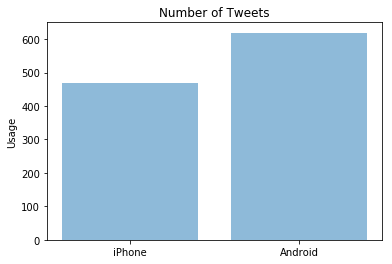

In [26]:
#Plot the number of tweets with iPhone in the training, to get an idea for baseline during validation

iphonetweets=(train['label']==-1).sum()
androidtweets=(train['label']==1).sum()
tweetcounts=[iphonetweets,androidtweets]
objects=('iPhone', 'Android')
x_axis=np.arange(len(objects))
plt.bar(x_axis,tweetcounts,align='center',alpha=0.5)
plt.xticks(x_axis, objects)
plt.ylabel('Usage')
plt.title('Number of Tweets')
plt.show()

In [27]:
#Isolate the text
train=train[['text','label']]
train.head()

,text,label
0,Senior United States District Judge Robert E. ...,-1
1,Speech on Veterans' Reform: https://t.co/XB7R...,-1
2,Great poll- Florida! Thank you! https://t.co/4...,-1
3,Thoughts and prayers with the victims; and the...,-1
4,Join me in Westfield; Indiana- tomorrow night ...,-1


In [28]:
#Split training into training and validation set
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(train['text'], train['label'])

In [29]:
#Use a count vectorizer to process the text data
count_vect1 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect1.fit(train['text'])

xtrain_count =  count_vect1.transform(train_x)
xvalid_count =  count_vect1.transform(valid_x)

In [30]:
def getAccuracy(classifier,train, label, validation):
    
    classifier.fit(train, label)
    predictions = classifier.predict(validation)
    
    return metrics.accuracy_score(predictions, valid_y)

In [31]:
#Accuracy of Naive Bayes on validation set
accuracyNB = getAccuracy(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print (accuracyNB)

0.8534798534798534


In [32]:
#Accuracy of SVM on validation set
accuracySVM = getAccuracy(svm.SVC(), xtrain_count, train_y, xvalid_count)
print (accuracySVM)

0.6593406593406593


C:\Users\Alex\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [33]:
#Accuracy of Random Forest on validation set
accuracyRF = getAccuracy(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print (accuracyRF)

0.8717948717948718


C:\Users\Alex\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
test=pd.read_csv("C:\\Users\\Alex\\Downloads\\all2\\test.csv")
traintestcombined=train['text'].append(test['text'])

In [36]:
#Count vectorizer to transform entire training set
count_vect2 = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect2.fit(traintestcombined)

xtrainfinal =  count_vect2.transform(train['text'])
xtestfinal =  count_vect2.transform(test['text'])

In [37]:
rf=ensemble.RandomForestClassifier(n_estimators=1000).fit(xtrainfinal,train['label'])

In [38]:
predictions2 = rf.predict(xtestfinal)

In [39]:
submit2=pd.DataFrame()
submit2['ID'] = test['id']
submit2['Label'] = predictions2

submit2.to_csv('4780RF.csv', index = False)